In [1]:
!pip install selenium

In [113]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

# Chromedriver의 절대 경로 설정
chromedriver_path = '../driver/chromedriver/chromedriver.exe'

# Service 객체 생성
service = Service(executable_path=chromedriver_path)

# Chrome 옵션 설정 (필요에 따라 추가 가능)
options = Options()
options.add_argument('--start-maximized')  # 브라우저 최대화

# WebDriver 초기화
driver = webdriver.Chrome(service=service, options=options)

# 오피넷 웹 페이지 열기
driver.get('http://www.opinet.co.kr/searRgSelect.do')

In [115]:
from selenium.webdriver.common.by import By

# 서울시 선택하기
si_list_raw = driver.find_element(By.XPATH, '//*[@id="SIDO_NM0"]')
si_list = si_list_raw.find_elements(By.TAG_NAME, 'option')

In [117]:
si_names = [option.get_attribute('value') for option in si_list]
si_names.remove('')
si_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [119]:
si_element = driver.find_element(By.XPATH, '//*[@id="SIDO_NM0"]')
si_element.send_keys(si_names[0])

In [121]:
# 시/군/구 선택하기
gu_list_raw = driver.find_element(By.XPATH, '//*[@id="SIGUNGU_NM0"]')
gu_list = gu_list_raw.find_elements(By.TAG_NAME, 'option')

gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [128]:
len(gu_names)

25

In [131]:
import time
from tqdm.notebook import tqdm
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

for gu in tqdm(gu_names[0]):
    # 시/군/구 선택하기
    element = driver.find_element(By.XPATH, '//*[@id="SIGUNGU_NM0"]')
    element.send_keys(gu)

    time.sleep(2)

    # 주유소 조회하기
    xpath = '//*[@id="searRgSelect"]'
    button = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, xpath)))
    button.click()
    
    # 엑셀파일 다운하기
    get_excel_path = '//*[@id="templ_list0"]/div[7]/div/a'
    button2 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, get_excel_path)))
    button2.click()
    
    time.sleep(2)

  0%|          | 0/3 [00:00<?, ?it/s]

In [134]:
driver.close()

In [1]:
import pandas as pd
from glob import glob

In [5]:
# 지역 엑셀파일 가져오기
stations_files = glob('../data/지역/지역*.xls')
stations_files

['../data/지역\\지역_위치별(주유소) (1).xls',
 '../data/지역\\지역_위치별(주유소) (10).xls',
 '../data/지역\\지역_위치별(주유소) (11).xls',
 '../data/지역\\지역_위치별(주유소) (12).xls',
 '../data/지역\\지역_위치별(주유소) (13).xls',
 '../data/지역\\지역_위치별(주유소) (14).xls',
 '../data/지역\\지역_위치별(주유소) (15).xls',
 '../data/지역\\지역_위치별(주유소) (16).xls',
 '../data/지역\\지역_위치별(주유소) (17).xls',
 '../data/지역\\지역_위치별(주유소) (18).xls',
 '../data/지역\\지역_위치별(주유소) (19).xls',
 '../data/지역\\지역_위치별(주유소) (2).xls',
 '../data/지역\\지역_위치별(주유소) (20).xls',
 '../data/지역\\지역_위치별(주유소) (21).xls',
 '../data/지역\\지역_위치별(주유소) (22).xls',
 '../data/지역\\지역_위치별(주유소) (23).xls',
 '../data/지역\\지역_위치별(주유소) (24).xls',
 '../data/지역\\지역_위치별(주유소) (3).xls',
 '../data/지역\\지역_위치별(주유소) (4).xls',
 '../data/지역\\지역_위치별(주유소) (5).xls',
 '../data/지역\\지역_위치별(주유소) (6).xls',
 '../data/지역\\지역_위치별(주유소) (7).xls',
 '../data/지역\\지역_위치별(주유소) (8).xls',
 '../data/지역\\지역_위치별(주유소) (9).xls',
 '../data/지역\\지역_위치별(주유소).xls']

In [19]:
!pip install xlrd>=2.0.1

In [23]:
a = pd.read_excel(stations_files[0], header=2)
a.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),HD현대오일뱅크,02-487-2030,Y,-,1719,1569,-
1,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,1925,1725,1575,-
2,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),HD현대오일뱅크,02-441-0536,N,-,1727,1595,-
3,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,Y,1970,1736,1608,1699
4,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,1959,1759,1649,-


In [29]:
# 엑셀 파일에서 원하는 데이터 추출하기
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)

In [35]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),HD현대오일뱅크,02-487-2030,Y,-,1719,1569,-
1,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,1925,1725,1575,-
2,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),HD현대오일뱅크,02-441-0536,N,-,1727,1595,-
3,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,Y,1970,1736,1608,1699
4,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,1959,1759,1649,-


In [55]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'],
                         '가격':station_raw['휘발유'],
                         '상표':station_raw['상표'],
                         '셀프':station_raw['셀프여부'],
                         '주소':station_raw['주소']})
stations.head()

,Oil_store,가격,상표,셀프,주소
0,재건에너지 재정제2주유소 고속셀프지점,1719,HD현대오일뱅크,Y,서울특별시 강동구 천호대로 1246 (둔촌제2동)
1,방아다리주유소,1725,SK에너지,Y,서울 강동구 동남로 811 (명일동)
2,구천면주유소,1727,HD현대오일뱅크,N,서울 강동구 구천면로 357 (암사동)
3,(주)삼표에너지 고덕주유소,1736,GS칼텍스,Y,서울 강동구 고덕로 39 (암사동)
4,지에스칼텍스㈜ 동서울주유소,1759,GS칼텍스,Y,서울 강동구 천호대로 1456 (상일동)


In [57]:
stations['구'] = [eachaddress.split()[1] for eachaddress in stations['주소']]
stations.head()

,Oil_store,가격,상표,셀프,주소,구
0,재건에너지 재정제2주유소 고속셀프지점,1719,HD현대오일뱅크,Y,서울특별시 강동구 천호대로 1246 (둔촌제2동),강동구
1,방아다리주유소,1725,SK에너지,Y,서울 강동구 동남로 811 (명일동),강동구
2,구천면주유소,1727,HD현대오일뱅크,N,서울 강동구 구천면로 357 (암사동),강동구
3,(주)삼표에너지 고덕주유소,1736,GS칼텍스,Y,서울 강동구 고덕로 39 (암사동),강동구
4,지에스칼텍스㈜ 동서울주유소,1759,GS칼텍스,Y,서울 강동구 천호대로 1456 (상일동),강동구


In [59]:
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [63]:
stations.reset_index(inplace=True)
del stations['index']

In [65]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  423 non-null    object
 1   가격         423 non-null    int64 
 2   상표         423 non-null    object
 3   셀프         423 non-null    object
 4   주소         423 non-null    object
 5   구          423 non-null    object
dtypes: int64(1), object(5)
memory usage: 20.0+ KB


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleFothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unkown system..')

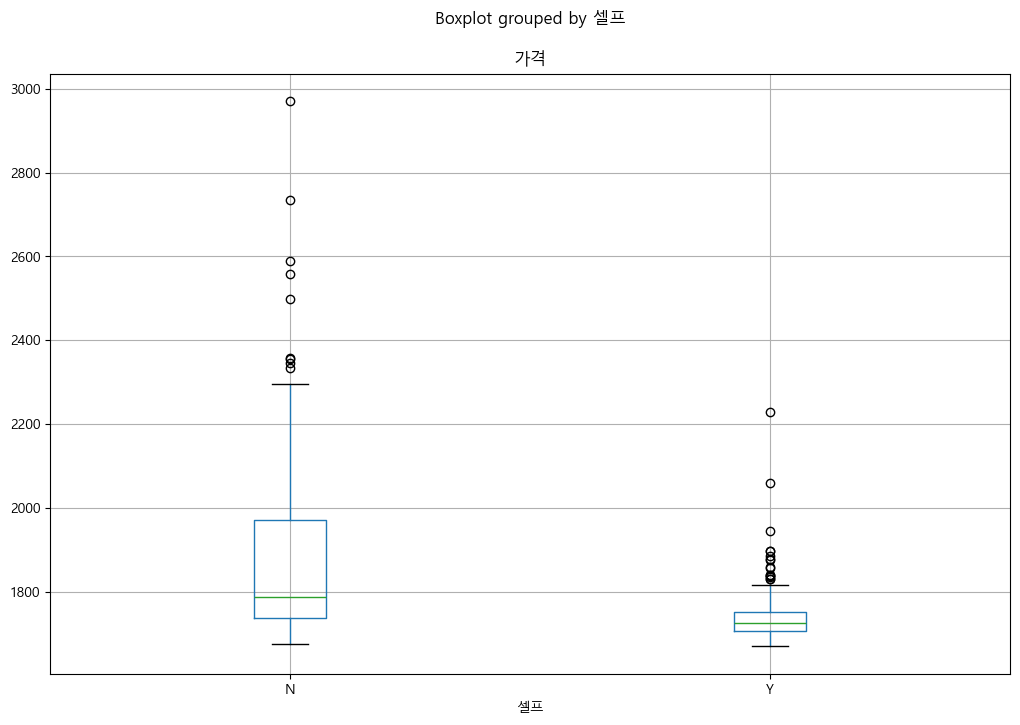

In [83]:
# 셀프여부에 따른 주유소 가격 분석 그래프 그리기
stations.boxplot(column='가격', by='셀프', figsize=(12,8));
plt.show()

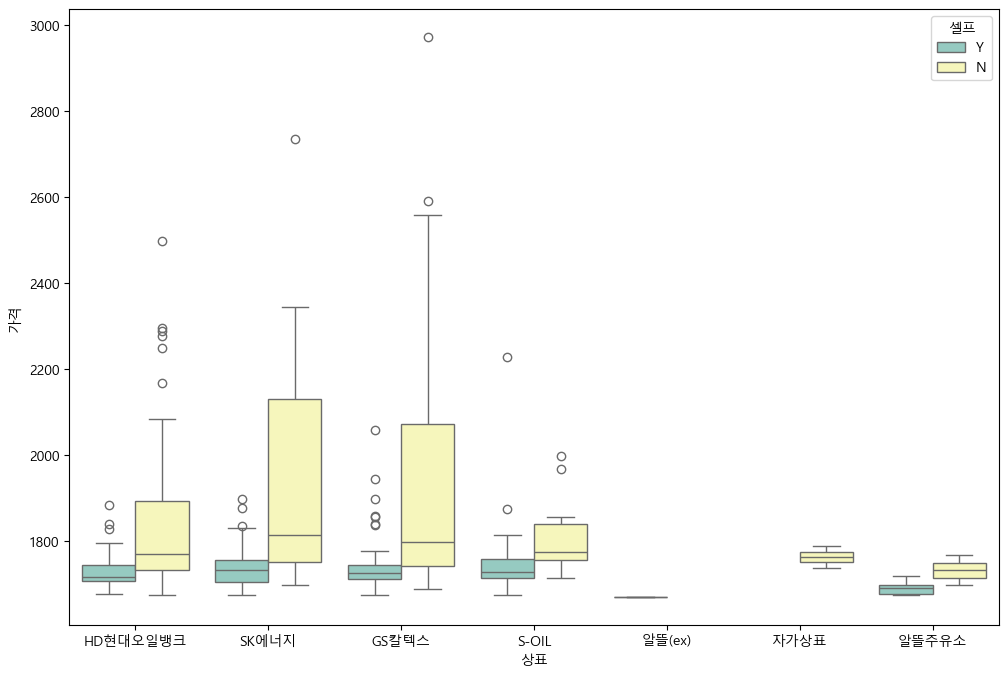

In [85]:
# 주유소 상표별 셀프주유소 가격 분석
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()

C:\Users\thaud\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thaud\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thaud\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thaud\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thaud\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.0% of the points 

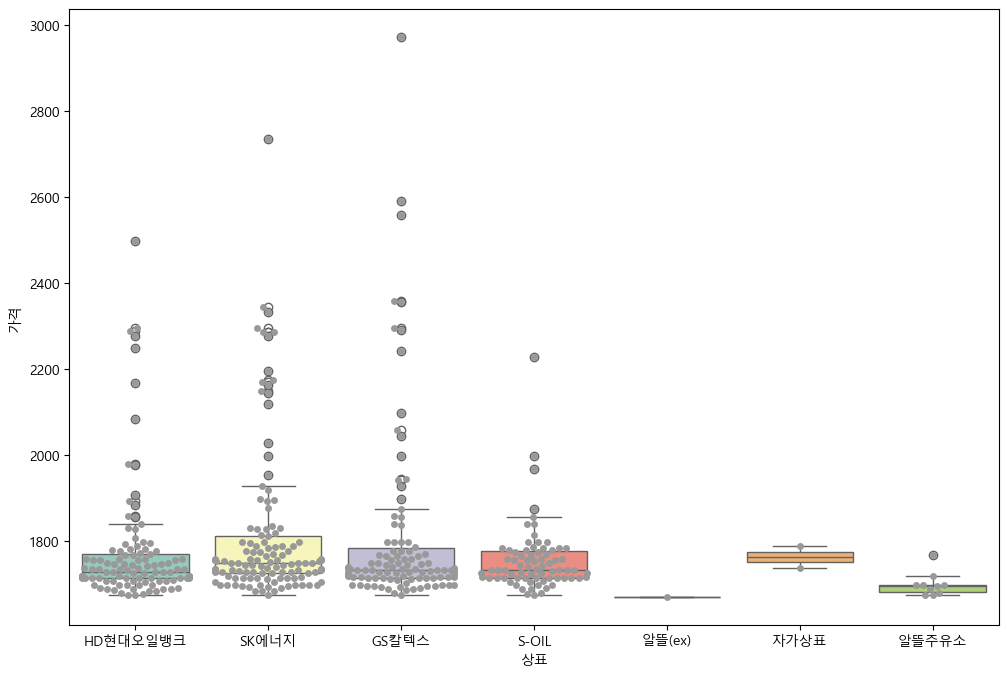

In [109]:
# 주유소 상표별 주유 가격 확인하기
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=stations, color='.6')
plt.show()

In [111]:
# 서울시 구별 주유 가격 확인하기
import json
import folium
import numpy as np

gu_data = pd.pivot_table(stations, index=['구'], values=['가격'], aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1959.200000
강동구,1788.538462
강북구,1716.400000
강서구,1742.757576
관악구,1780.000000


In [147]:
len(gu_data.index.unique())

25

In [121]:
geo_path = '../data/03. skorea-municipalities-2018-geo.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5,
                 tiles='CartoDB positron')
folium.Choropleth(geo_data = geo_data,
               data = gu_data,
               columns=[gu_data.index, '가격'],
               fill_color = 'RdBu_r',
               key_on='properties.name_eng').add_to(map)                                                
map

In [161]:
# 서울시 주유 가격 상위 10개 구
oil_price_top5 = gu_data.sort_values(by='가격', ascending=False).head()
oil_price_top5

,가격
구,
용산구,2268.2500
중구,2049.1000
강남구,1959.2000
종로구,1871.3750
성동구,1820.5625


In [163]:
# 서울시 주유 가격 하위 10개 구
oil_price_bottom5 = gu_data.sort_values(by='가격', ascending=True).head()
oil_price_bottom5

,가격
구,
은평구,1694.866667
서대문구,1708.076923
강북구,1716.400000
도봉구,1723.153846
양천구,1726.083333


In [137]:
# 서울시 구별 위도, 경도 데이터 가져오기
# https://blog.naver.com/kiakass/222449339999

city_geo = pd.read_excel('../data/03. korea_administrative_division_latitude_longitude.xlsx')
city_geo.head()

,docity,do,city,longitude,latitude
0,강원강릉시,강원,강릉시,128.878497,37.749136
1,강원고성군,강원,고성군,128.470164,38.377961
2,강원동해시,강원,동해시,129.116633,37.521931
3,강원삼척시,강원,삼척시,129.167489,37.447086
4,강원속초시,강원,속초시,128.594167,38.204275


In [139]:
city_geo['do'].unique()

array(['강원', '경기', '경상', '광주시', '대구시', '대전시', '부산시', '서울', '울산시', '인천시',
       '전라', '제주', '충청'], dtype=object)

In [143]:
seoul_geo = city_geo[city_geo['do']=='서울']
seoul_geo.head()

,docity,do,city,longitude,latitude
138,서울강남구,서울,강남구,127.049556,37.514575
139,서울강동구,서울,강동구,127.125864,37.527367
140,서울강북구,서울,강북구,127.027719,37.636956
141,서울강서구,서울,강서구,126.851675,37.548156
142,서울관악구,서울,관악구,126.953844,37.475386


In [155]:
len(seoul_geo)

25

In [153]:
seoul_geo['city'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [200]:
oil_price_top5['lat'] = np.nan
oil_price_top5['lng'] = np.nan
oil_price_top5

,가격,lat,lng
구,,,
용산구,2268.2500,NaN,NaN
중구,2049.1000,NaN,NaN
강남구,1959.2000,NaN,NaN
종로구,1871.3750,NaN,NaN
성동구,1820.5625,NaN,NaN


In [204]:
for i, gu_name in enumerate(oil_price_top5.index):
    for j, gu_geo in enumerate(seoul_geo.values):
        if gu_name == gu_geo[2]:
            oil_price_top5['lng'][i] = gu_geo[3]
            oil_price_top5['lat'][i] = gu_geo[4]

oil_price_top5

,가격,lat,lng
구,,,
용산구,2268.2500,37.536094,126.967522
중구,2049.1000,37.561003,126.999642
강남구,1959.2000,37.514575,127.049556
종로구,1871.3750,37.570378,126.981642
성동구,1820.5625,37.560611,127.039000


In [206]:
oil_price_bottom5['lat'] = np.nan
oil_price_bottom5['lng'] = np.nan

for i, gu_name in enumerate(oil_price_bottom5.index):
    for j, gu_geo in enumerate(seoul_geo.values):
        if gu_name == gu_geo[2]:
            oil_price_bottom5['lng'][i] = gu_geo[3]
            oil_price_bottom5['lat'][i] = gu_geo[4]

oil_price_bottom5

,가격,lat,lng
구,,,
은평구,1694.866667,37.599969,126.931242
서대문구,1708.076923,37.576367,126.938897
강북구,1716.400000,37.636956,127.027719
도봉구,1723.153846,37.665833,127.049522
양천구,1726.083333,37.514231,126.868708


In [226]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5)

for i, gu_top5 in enumerate(oil_price_top5.values):
    folium.CircleMarker([gu_top5[1], gu_top5[2]],
                        radius = 30, color = '#CD3181',
                        fill_color = '#CD3181').add_to(map).add_child(folium.Tooltip(f"gu_top5: {oil_price_top5.index[i]}", permanent=True))

for i, gu_bottom5 in enumerate(oil_price_bottom5.values):
    folium.CircleMarker([gu_bottom5[1], gu_bottom5[2]],
                        radius =30, color = '#3186cc',
                        fill_color = '#3186cc').add_to(map).add_child(folium.Tooltip(f"gu_bottom5: {oil_price_bottom5.index[i]}",permanent=True))

    
map